In [3]:
import datetime, mmap,os,re, sys, decimal, hddm
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy as sp
from misc import sdt_calc
from patsy import dmatrix
% matplotlib inline 
#% load_ext rpy2.ipython
#%R library(lsmeans)
#%R library(afex)

In [14]:
path2data = '/Users/mlm2/Work/Expts/StressMem/Data/Beh_Pilots/'

adding in our 5 pilots...

In [15]:
val = pd.read_csv('/Users/mlm2/Work/Expts/StressMem/PsychoPy/Stimuli/balanced_words.csv')

In [16]:
data = pd.read_csv(path2data + 'Pilot4_StressMem_Retrieval_1.csv')
data = data.append(pd.read_csv(path2data + 'Pilot5_StressMem_Retrieval_1.csv'))
data = data.append(pd.read_csv(path2data + 'Pilot3_StressMem_Retrieval_1.csv'))
data = data.append(pd.read_csv(path2data + 'Pilot2_StressMem_Retrieval_1.csv'))
data = data.append(pd.read_csv(path2data + 'Pilot1_StressMem_Retrieval_1.csv'))
data.head(10)
data = data.merge(val, on='word', how = 'outer')

In [32]:
data.loc[(data['recog_resp'] <= 3) & (data['status'] == 'old'), 'recog_result'] = 'hit'
data.loc[(data['recog_resp'] <= 3) & (data['status'] == 'new'), 'recog_result'] = 'fas'
data.loc[(data['recog_resp'] > 3) & (data['status'] == 'new'), 'recog_result'] = 'crs'
data.loc[(data['recog_resp'] > 3) & (data['status'] == 'old'), 'recog_result'] = 'misses'
data.head(10)
data.loc[(data['valence'] == 0.0), 'valence'] = 'neg'
data.loc[(data['valence'] == 1.0), 'valence'] = 'pos'
data.head(10)

,subject,session,trial,word,status,recog_resp,recog_rt,task,task_resp,task_rt,...,Unnamed: 0,mean_valence,mean_arousal,valence,letters,frequency,concreteness,part_of_speech,imageability,recog_result
0,Pilot4,1.0,1.0,annoying,new,6.0,1.850,NaN,NaN,999.000,...,5.0,3.00,5.55,neg,8.0,567.0,2.31,adj,3.14,crs
1,Pilot2,1.0,41.0,annoying,new,2.0,0.285,NaN,1.0,0.485,...,5.0,3.00,5.55,neg,8.0,567.0,2.31,adj,3.14,fas
2,Pilot4,1.0,2.0,miserable,new,5.0,0.417,NaN,NaN,999.000,...,96.0,2.60,5.06,neg,9.0,1096.0,1.97,adj,3.66,crs
3,Pilot3,1.0,65.0,miserable,new,5.0,0.417,NaN,NaN,999.000,...,96.0,2.60,5.06,neg,9.0,1096.0,1.97,adj,3.66,crs
4,Pilot4,1.0,3.0,heartbroken,new,5.0,1.017,NaN,NaN,999.000,...,67.0,1.95,6.60,neg,11.0,93.0,2.37,adj,3.68,crs
5,Pilot3,1.0,1.0,heartbroken,new,5.0,1.217,NaN,NaN,999.000,...,67.0,1.95,6.60,neg,11.0,93.0,2.37,adj,3.68,crs
6,Pilot2,1.0,12.0,heartbroken,new,3.0,1.002,NaN,NaN,999.000,...,67.0,1.95,6.60,neg,11.0,93.0,2.37,adj,3.68,fas
7,Pilot4,1.0,4.0,grumpy,old,1.0,1.767,Describes_you,6.0,0.800,...,60.0,2.81,5.05,neg,6.0,120.0,2.41,adj,4.42,hit
8,Pilot5,1.0,60.0,grumpy,old,6.0,2.255,Emotion,NaN,999.000,...,60.0,2.81,5.05,neg,6.0,120.0,2.41,adj,4.42,misses
9,Pilot4,1.0,5.0,confident,old,1.0,0.584,Describes_you,5.0,1.400,...,206.0,7.56,4.62,pos,9.0,543.0,2.62,adj,4.00,hit


In [7]:
data.recog_result.value_counts()

crs       172
hit       137
fas        60
misses     38
Name: recog_result, dtype: int64

In [8]:
# in the order hits, misses, fas, crs
rates = [data.recog_result.value_counts().hit,
         data.recog_result.value_counts().misses,
         data.recog_result.value_counts().fas, 
         data.recog_result.value_counts().crs]

Overall...

In [9]:
sdt_calc(rates)

{'Ad': 0.84394315150333354,
 'FAR': 0.25862068965517243,
 'HR': 0.78285714285714281,
 'beta': 0.4126764200736763,
 'c': -0.067137685844678052,
 'dprime': 1.4294825375393114}

For each subject...

In [10]:
subject_list = [data.groupby(['subject']).recog_result.value_counts().Pilot1, 
            data.groupby('subject').recog_result.value_counts().Pilot2, 
            data.groupby('subject').recog_result.value_counts().Pilot3, 
            data.groupby('subject').recog_result.value_counts().Pilot4, 
            data.groupby('subject').recog_result.value_counts().Pilot5]
for item in subject_list:
    rates = [item.hit,
            item.misses,
            item.fas,
            item.crs]
    print (sdt_calc(rates))
    print ('\n')


{'HR': 0.88, 'FAR': 0.045454545454545456, 'dprime': 2.8656084216509878, 'beta': 2.191224132615773, 'c': 0.25781741875940367, 'Ad': 0.97863252103766396}


{'HR': 0.83999999999999997, 'FAR': 0.57777777777777772, 'dprime': 0.79824614956456963, 'beta': 0.19328400994787834, 'c': -0.59533480842746822, 'Ad': 0.71377442980582317}


{'HR': 0.83999999999999997, 'FAR': 0.23255813953488372, 'dprime': 1.7249060602079189, 'beta': 0.31709967487113483, 'c': -0.13200485310579357, 'Ad': 0.88870931868865566}


{'HR': 0.92000000000000004, 'FAR': 0.32000000000000001, 'dprime': 1.8727703594241412, 'beta': 0.08641179438026964, 'c': -0.46868638059756229, 'Ad': 0.90728975596780481}


{'HR': 0.54000000000000004, 'FAR': 0.12, 'dprime': 1.2754205125775602, 'beta': 1.9686732697834326, 'c': 0.53727653577731027, 'Ad': 0.81643397867972112}




For subjects 4 + 5 for positive/negative...  
(subjects 1-3 didn't have old negative words)

In [48]:
subject_list = [data.groupby(['subject','valence']).recog_result.value_counts().Pilot4.pos, 
                data.groupby(['subject','valence']).recog_result.value_counts().Pilot4.neg,
                data.groupby(['subject','valence']).recog_result.value_counts().Pilot5.pos,
                data.groupby(['subject','valence']).recog_result.value_counts().Pilot5.neg]
count = 0
for item in subject_list:
    rates = [item.hit,
            item.misses,
            item.fas,
            item.crs]
    if count == 0:
        print ('Pilot4 positive:')
        count = count + 1
    elif count == 1:
        print ('Pilot4 negative:')
        count = count + 1
    elif count == 2:
        print ('Pilot5 positive:')
        count = count + 1
    else:
        print ('Pilot5 negative:')
    print (sdt_calc(rates))
    print ('\n')

Pilot4 positive:
{'HR': 0.92000000000000004, 'FAR': 0.32000000000000001, 'dprime': 1.8727703594241412, 'beta': 0.08641179438026964, 'c': -0.46868638059756229, 'Ad': 0.90728975596780481}


Pilot4 negative:
{'HR': 0.91666666666666663, 'FAR': 0.32000000000000001, 'dprime': 1.8506929262151464, 'beta': 0.09189783855201664, 'c': -0.45764766399306489, 'Ad': 0.90467141707225474}


Pilot5 positive:
{'HR': 0.59999999999999998, 'FAR': 0.125, 'dprime': 1.4036964835118075, 'beta': 1.7611583777083735, 'c': 0.4485011386201041, 'Ad': 0.83953859194838021}


Pilot5 negative:
{'HR': 0.5, 'FAR': 0.12, 'dprime': 1.1749867920660904, 'beta': 1.988631633719137, 'c': 0.58749339603304518, 'Ad': 0.79696830753938264}




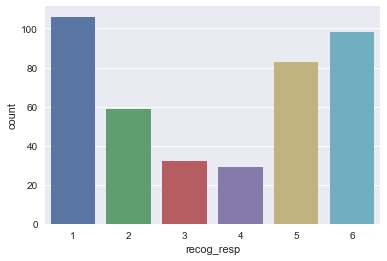

In [11]:
resp_plot = sns.countplot(x="recog_resp", data=data, order=[1,2,3,4,5,6])

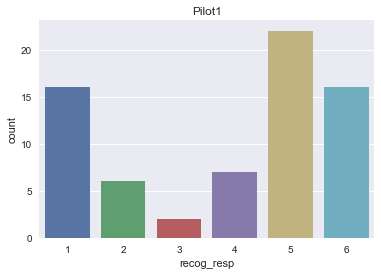

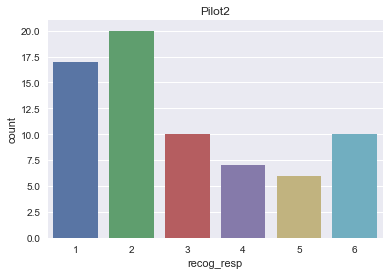

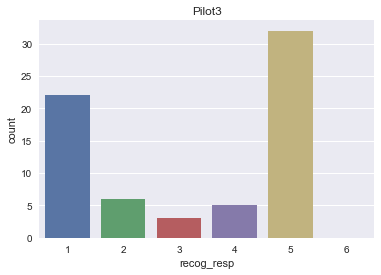

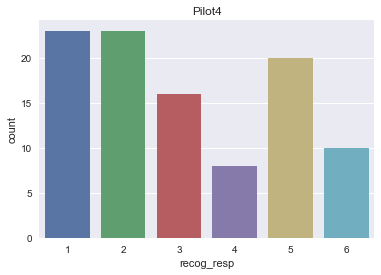

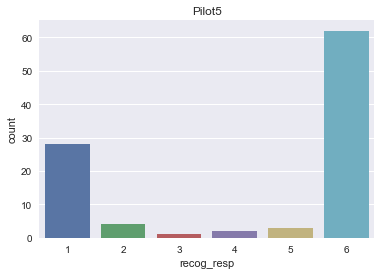

In [12]:
sublist = ['Pilot1', 'Pilot2', 'Pilot3', 'Pilot4', 'Pilot5']
for sub in sublist:
    plt.figure()
    resp_count = sns.countplot(x="recog_resp", data=data[data.subject == sub], order=[1,2,3,4,5,6])
    sns.plt.title(sub)

## Source

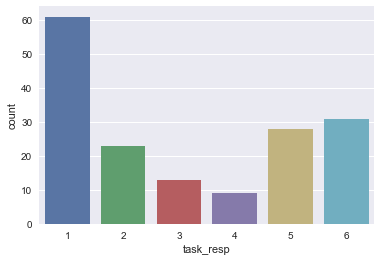

In [39]:
task_plot = sns.countplot(x="task_resp", data=data, order=[1,2,3,4,5,6])

In [40]:
hits = data.loc[(data['recog_result'] == 'hit') & (data['task_rt'] < 999)]
hits.head()

,subject,session,trial,word,status,recog_resp,recog_rt,task,task_resp,task_rt,...,Unnamed: 0,mean_valence,mean_arousal,valence,letters,frequency,concreteness,part_of_speech,imageability,recog_result
7,Pilot4,1.0,4.0,grumpy,old,1.0,1.767,Describes_you,6.0,0.800,...,60.0,2.81,5.05,neg,6.0,120.0,2.41,adj,4.42,hit
9,Pilot4,1.0,5.0,confident,old,1.0,0.584,Describes_you,5.0,1.400,...,206.0,7.56,4.62,pos,9.0,543.0,2.62,adj,4.00,hit
11,Pilot3,1.0,57.0,confident,old,1.0,5.234,Describes_you,2.0,4.204,...,206.0,7.56,4.62,pos,9.0,543.0,2.62,adj,4.00,hit
13,Pilot5,1.0,67.0,smart,old,1.0,0.669,Emotion,6.0,0.686,...,310.0,7.73,3.81,pos,5.0,4909.0,1.75,adj,3.76,hit
18,Pilot4,1.0,9.0,expert,old,1.0,0.717,Describes_you,6.0,2.034,...,229.0,6.74,4.05,pos,6.0,1128.0,2.85,noun,3.54,hit


In [41]:
hits['source_correct'] = 0
hits.loc[(hits['task'] == 'Describes_you') & (hits['task_resp'] > 3), 'source_correct'] = 1
hits.loc[(hits['task'] == 'Emotion') & (hits['task_resp'] < 4), 'source_correct'] = 1
hits

/Users/mlm2/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mlm2/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,subject,session,trial,word,status,recog_resp,recog_rt,task,task_resp,task_rt,...,mean_valence,mean_arousal,valence,letters,frequency,concreteness,part_of_speech,imageability,recog_result,source_correct
7,Pilot4,1.0,4.0,grumpy,old,1.0,1.767,Describes_you,6.0,0.800,...,2.81,5.05,neg,6.0,120.0,2.41,adj,4.42,hit,1
9,Pilot4,1.0,5.0,confident,old,1.0,0.584,Describes_you,5.0,1.400,...,7.56,4.62,pos,9.0,543.0,2.62,adj,4.00,hit,1
11,Pilot3,1.0,57.0,confident,old,1.0,5.234,Describes_you,2.0,4.204,...,7.56,4.62,pos,9.0,543.0,2.62,adj,4.00,hit,0
13,Pilot5,1.0,67.0,smart,old,1.0,0.669,Emotion,6.0,0.686,...,7.73,3.81,pos,5.0,4909.0,1.75,adj,3.76,hit,0
18,Pilot4,1.0,9.0,expert,old,1.0,0.717,Describes_you,6.0,2.034,...,6.74,4.05,pos,6.0,1128.0,2.85,noun,3.54,hit,1
20,Pilot2,1.0,8.0,expert,old,1.0,0.452,Describes_you,6.0,0.719,...,6.74,4.05,pos,6.0,1128.0,2.85,noun,3.54,hit,1
23,Pilot4,1.0,11.0,witty,old,1.0,0.567,Describes_you,6.0,0.550,...,7.25,5.65,pos,5.0,163.0,2.21,adj,3.30,hit,1
30,Pilot4,1.0,14.0,immoral,old,1.0,0.917,Emotion,1.0,1.567,...,2.79,5.42,neg,7.0,133.0,1.59,adj,2.60,hit,1
32,Pilot4,1.0,15.0,happy,old,1.0,0.400,Describes_you,6.0,0.567,...,8.47,6.05,pos,5.0,16993.0,2.56,adj,4.52,hit,1
35,Pilot1,1.0,9.0,happy,old,2.0,2.204,Describes_you,5.0,0.802,...,8.47,6.05,pos,5.0,16993.0,2.56,adj,4.52,hit,1


In [42]:
hits.source_correct.value_counts()

1    98
0    26
Name: source_correct, dtype: int64

In [43]:
hits.groupby('subject').source_correct.value_counts()

subject  source_correct
Pilot1   1                 18
         0                  2
Pilot2   1                 13
         0                  6
Pilot3   1                 18
         0                  2
Pilot4   1                 29
         0                  9
Pilot5   1                 20
         0                  7
Name: source_correct, dtype: int64

In [44]:
hits.groupby('task').source_correct.value_counts()

task           source_correct
Describes_you  1                 48
               0                 19
Emotion        1                 50
               0                  7
Name: source_correct, dtype: int64

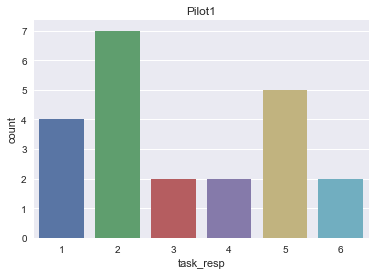

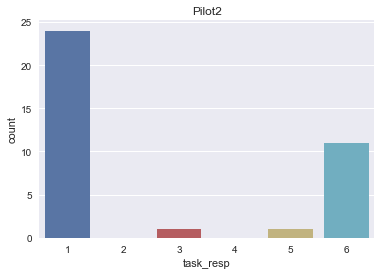

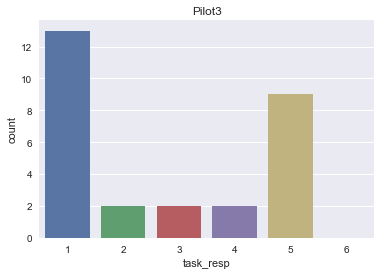

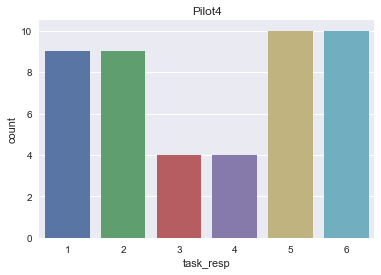

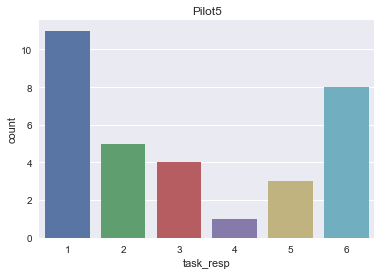

In [45]:
sublist = ['Pilot1', 'Pilot2', 'Pilot3', 'Pilot4', 'Pilot5']
for sub in sublist:
    plt.figure()
    resp_count = sns.countplot(x="task_resp", data=data[data.subject == sub], order=[1,2,3,4,5,6])
    sns.plt.title(sub)